과제!!
MNIST test data에 대해 accuracy 98% 이상인 모델 만들어보기

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [32]:
x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [33]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [34]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [35]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.25
)
datagen.fit(x_train)

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'training')
val_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'validation')

history = model.fit_generator( train_generator,
                               epochs = 5,
                               verbose = 1,
                               validation_data = val_generator
                               )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
704/704 [==============================] - 52s 73ms/step - loss: 0.8502 - accuracy: 0.7156 - val_loss: 0.2710 - val_accuracy: 0.9139
Epoch 2/5
704/704 [==============================] - 51s 73ms/step - loss: 0.1822 - accuracy: 0.9420 - val_loss: 0.1807 - val_accuracy: 0.9445
Epoch 3/5
704/704 [==============================] - 51s 73ms/step - loss: 0.1211 - accuracy: 0.9633 - val_loss: 0.1103 - val_accuracy: 0.9660
Epoch 4/5
704/704 [==============================] - 51s 73ms/step - loss: 0.0935 - accuracy: 0.9707 - val_loss: 0.0984 - val_accuracy: 0.9680
Epoch 5/5
704/704 [==============================] - 51s 73ms/step - loss: 0.0821 - accuracy: 0.9739 - val_loss: 0.0754 - val_accuracy: 0.9774


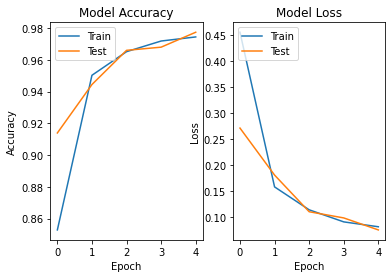

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [40]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'test loss : {loss} / test accuracy : {accuracy}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0455 - accuracy: 0.9858
test loss : 0.0455099381506443 / test accuracy : 0.98580002784729
